Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


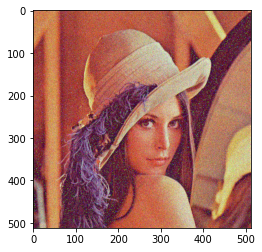

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.layers import GaussianNoise,Conv2D,BatchNormalization,Input,Dense,Add,ReLU
from tensorflow.keras.models import Model
import numpy as np
from google.colab import drive
import PIL
from IPython.display import Image
import matplotlib.pyplot as plt

(x_train,_),(x_test,_) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test/255.0
y_train, y_test = x_train,x_test

drive.mount('/content/gdrive')

#modeling
input_layer = Input(shape = (None,None,3))
nin=GaussianNoise(0.1)(input_layer)
model = Conv2D(filters=64,kernel_size=3,padding='same')(nin)
model = BatchNormalization()(model)
model = ReLU()(model)
model = Conv2D(filters=64,kernel_size=3,padding='same')(model)
model = BatchNormalization()(model)
model = ReLU()(model)
model = Conv2D(filters=64,kernel_size=3,padding='same')(model)
model = BatchNormalization()(model)
model = ReLU()(model)
model = Conv2D(filters=64,kernel_size=3,padding='same')(model)
model = BatchNormalization()(model)
model = ReLU()(model)
model = Conv2D(filters=3,kernel_size=3,padding='same')(model)
nout = Add()([nin,model])

model_3 = tf.keras.models.Model(inputs = input_layer, outputs = nout)
model_3.compile(optimizer="Adam",loss='MeanSquaredError',metrics=['accuracy'])

#training
model_3.fit(x=x_train, y=y_train, batch_size=32, epochs=100)

noise_image = np.asarray(PIL.Image.open('/content/gdrive/My Drive/Colab Notebooks/noisy(1).png'))
noise_image=noise_image/255.0
noise_image=np.array([noise_image])

#inference
predictions=model_3.predict(noise_image)
predict_image = predictions[0]*255.0

#print inferenced picture
im = PIL.Image.fromarray(predict_image.astype('uint8'),'RGB')
im.save('/content/gdrive/My Drive/Colab Notebooks/Model3.png')
plt.imshow(im)
plt.show()

In [12]:
#psnr 비교

noise_image = np.asarray(PIL.Image.open('/content/gdrive/My Drive/Colab Notebooks/noisy(1).png'))
model1_image = np.asarray(PIL.Image.open('/content/gdrive/My Drive/Colab Notebooks/Model1.png'))
model2_image =np.asarray(PIL.Image.open('/content/gdrive/My Drive/Colab Notebooks/Model2.png'))
model3_image = np.asarray(PIL.Image.open('/content/gdrive/My Drive/Colab Notebooks/Model3.png'))

psnr1 = tf.image.psnr(noise_image, model1_image, max_val=255)
psnr2 = tf.image.psnr(noise_image, model2_image, max_val=255)
psnr3 = tf.image.psnr(noise_image, model3_image, max_val=255)
print(' psnr1 : ',psnr1,' psnr2 : ',psnr2,' psnr3 : ',psnr3)

 psnr1 :  tf.Tensor(20.666485, shape=(), dtype=float32)  psnr2 :  tf.Tensor(20.667875, shape=(), dtype=float32)  psnr3 :  tf.Tensor(20.602877, shape=(), dtype=float32)


In [13]:
psnr1

<tf.Tensor: shape=(), dtype=float32, numpy=20.666485>